# **1. Perkenalan Dataset**


   Sumber Dataset: https://www.kaggle.com/datasets/umuttuygurr/e-commerce-customer-behavior-and-sales-analysis-tr

## 📊 Gambaran Umum Kumpulan Data
Dataset ini terdiri dari **5.000 transaksi e-commerce** yang dikumpulkan dari **platform ritel online Turki**, mencakup periode dari **Januari 2023 hingga Maret 2024**. Dataset ini menyediakan informasi yang kaya tentang **demografi pelanggan, perilaku pembelian, karakteristik produk, dan metrik keterlibatan**, sehingga cocok untuk tugas pemodelan analitis dan prediktif dalam ilmu data dan pembelajaran mesin.

Dataset ini dirancang untuk mendukung **analisis empiris berbasis data** untuk memahami perilaku konsumen dan mengoptimalkan strategi bisnis e-commerce.

---

## 📁 Struktur Dataset
Dataset ini berisi **18 kolom**, yang dikelompokkan ke dalam grup fitur berikut:

### 1️⃣ Informasi Pesanan
| Nama Kolom | Deskripsi |
|------------|------------|
| `Order_ID` | Pengidentifikasi unik untuk setiap pesanan (`ORD_XXXXXX`) |
| `Date` | Tanggal transaksi (2023-01-01 hingga 2024-03-26) |

### 2️⃣ Demografi Pelanggan
| Nama Kolom | Deskripsi |
|------------|------------|
| `Customer_ID` | Pengidentifikasi pelanggan unik (`CUST_XXXXX`) |
| `Age` | Usia pelanggan (18–75 tahun) |
| `Gender` | Jenis kelamin pelanggan (Laki-laki, Perempuan, Lainnya) |
| `City` | Kota pelanggan (10 kota besar di Turki) |

### 3️⃣ Informasi Produk
| Nama Kolom | Deskripsi |
|------------|------------|
| `Product_Category` | Kategori produk (Elektronik, Fesyen, Rumah & Taman, Olahraga, Buku, Kecantikan, Mainan, Makanan) |
| `Unit_Price` | Harga per unit (TRY – Lira Turki) |
| `Quantity` | Jumlah unit yang dibeli (1–5) |

### 4️⃣ Detail Transaksi
| Nama Kolom | Deskripsi |
|------------|------------|
| `Discount_Amount` | Diskon yang diterapkan pada transaksi |
| `Total_Amount` | Jumlah transaksi akhir setelah diskon |
| `Payment_Method` | Metode pembayaran yang digunakan (5 jenis) |

### 5️⃣ Metrik Perilaku Pelanggan
| Nama Kolom | Deskripsi |
|------------|------------|
| `Device_Type` | Perangkat yang digunakan (Ponsel, Desktop, Tablet) |
| `Session_Duration_Minutes` | Waktu yang dihabiskan di situs web (1–120 menit) |
| `Pages_Viewed` | Jumlah halaman yang dilihat selama sesi (1–50) | | `Is_Returning_Customer` | Menunjukkan apakah pelanggan akan kembali (Benar/Salah) |

### 6️⃣ Metrik Pasca Pembelian
| Nama Kolom | Deskripsi |
|------------|------------|
| `Delivery_Time_Days` | Durasi pengiriman (1–30 hari) |
| `Customer_Rating` | Peringkat kepuasan pelanggan (1–5 bintang) |

---

# **2. Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3. Memuat Dataset**

In [3]:
# Memuat data (Pastikan file csv berada di folder yang sama atau tentukan path-nya)
df = pd.read_csv('customer_behavior.csv')

# Menampilkan 5 baris pertama
print("Struktur Data Awal:")
df.head()

Struktur Data Awal:


,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


In [4]:
# Mengecek informasi dasar dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Order_ID                  5000 non-null   object 
 1   Customer_ID               5000 non-null   object 
 2   Date                      5000 non-null   object 
 3   Age                       5000 non-null   int64  
 4   Gender                    5000 non-null   object 
 5   City                      5000 non-null   object 
 6   Product_Category          5000 non-null   object 
 7   Unit_Price                5000 non-null   float64
 8   Quantity                  5000 non-null   int64  
 9   Discount_Amount           5000 non-null   float64
 10  Total_Amount              5000 non-null   float64
 11  Payment_Method            5000 non-null   object 
 12  Device_Type               5000 non-null   object 
 13  Session_Duration_Minutes  5000 non-null   i

# **4. Exploratory Data Analysis (EDA)**


In [5]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [6]:
# Check for missing values
df.isnull().sum()

,0
Order_ID,0
Customer_ID,0
Date,0
Age,0
Gender,0
City,0
Product_Category,0
Unit_Price,0
Quantity,0
Discount_Amount,0


In [7]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
df.describe()



Statistik Deskriptif:


,Age,Unit_Price,Quantity,Discount_Amount,Total_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.00000,5000.000000,5000.000000
mean,35.032600,455.834120,2.220000,24.852804,983.108914,14.57340,8.98420,6.497000,3.902800
std,11.080546,712.477209,1.398711,88.385124,1898.978528,8.66575,2.80434,3.464966,1.128542
min,18.000000,5.180000,1.000000,0.000000,7.870000,1.00000,1.00000,1.000000,1.000000
25%,27.000000,76.587500,1.000000,0.000000,122.517500,8.00000,7.00000,4.000000,3.000000
50%,35.000000,182.950000,2.000000,0.000000,337.910000,13.00000,9.00000,6.000000,4.000000
75%,42.000000,513.930000,3.000000,8.760000,979.695000,19.00000,11.00000,8.000000,5.000000
max,75.000000,7159.450000,5.000000,1525.550000,22023.900000,73.00000,24.00000,25.000000,5.000000


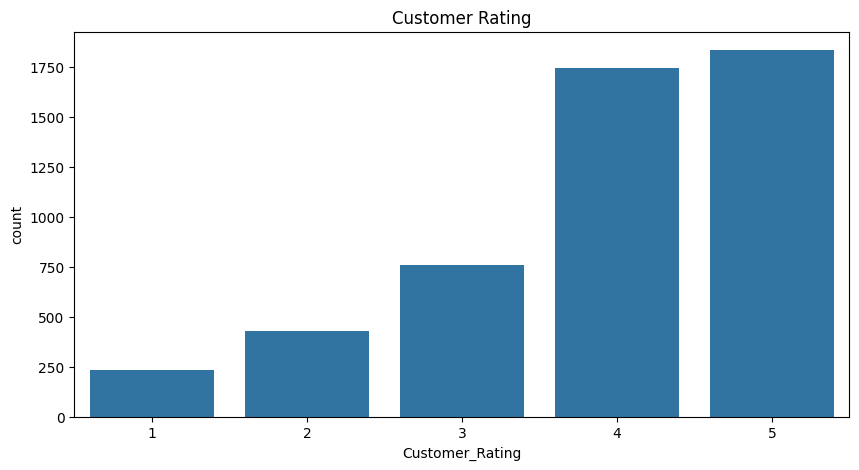

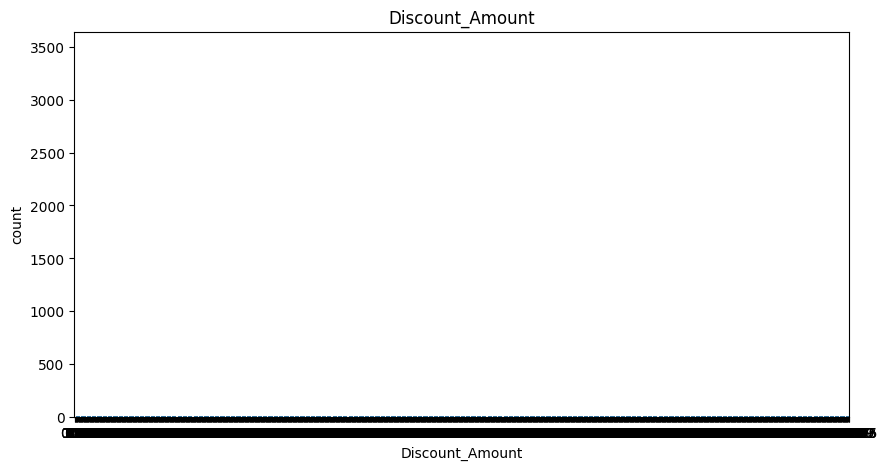

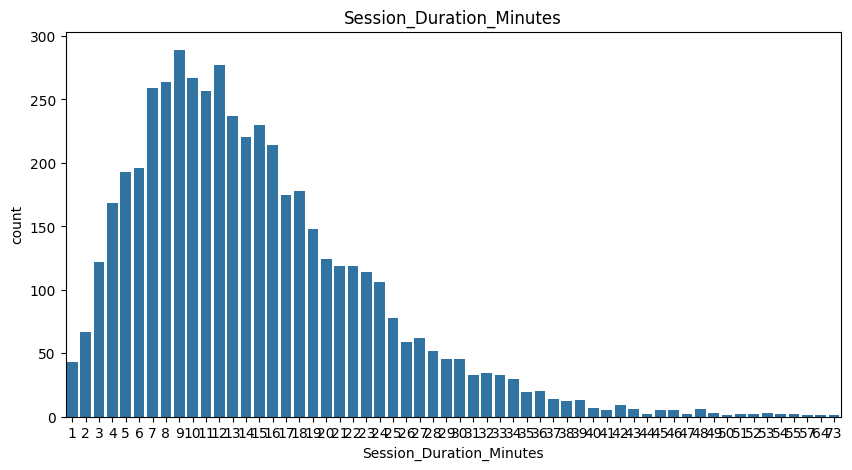

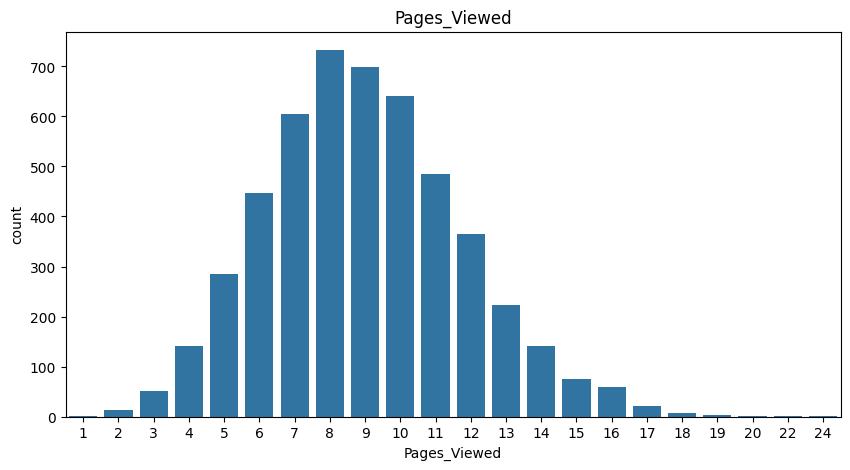

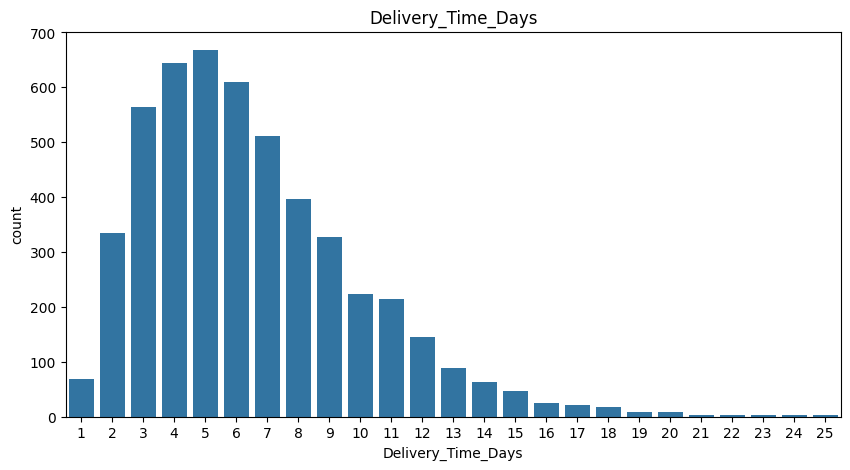

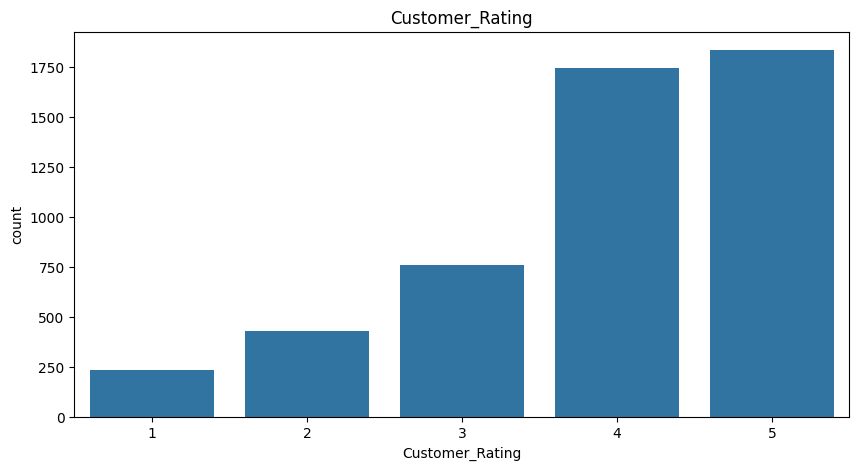

In [8]:
# Visualisasi distribusi target
plt.figure(figsize=(10, 5))
sns.countplot(x='Customer_Rating', data=df)
plt.title('Customer Rating')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Discount_Amount', data=df)
plt.title('Discount_Amount')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Session_Duration_Minutes', data=df)
plt.title('Session_Duration_Minutes')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Pages_Viewed', data=df)
plt.title('Pages_Viewed')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Delivery_Time_Days', data=df)
plt.title('Delivery_Time_Days')
plt.show()

plt.figure(figsize=(10, 5))
sns.countplot(x='Customer_Rating', data=df)
plt.title('Customer_Rating')
plt.show()

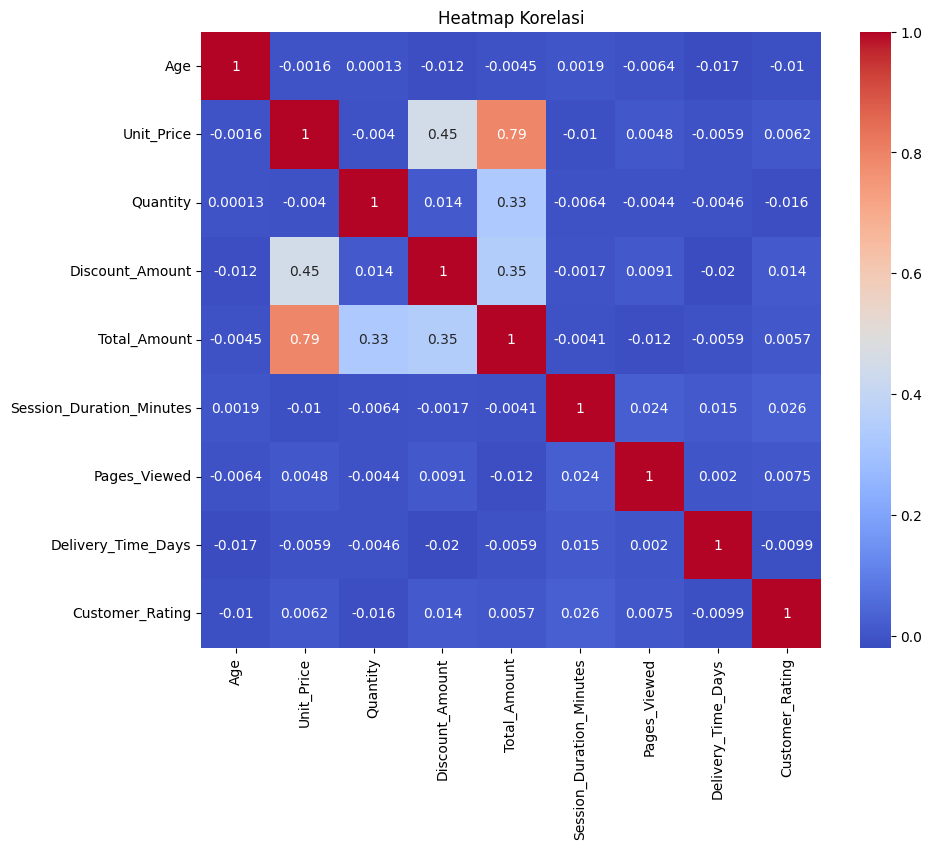

In [9]:
# Visualisasi korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

In [10]:
# Menghapus Data Duplikat & Kosong
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Menghapus Kolom yang Tidak Berguna
df = df.drop(['Order_ID', 'Customer_ID', 'Date',  'Age', 'Gender', 'City', 'Product_Category',  'Unit_Price',  'Quantity',  'Total_Amount',   'Payment_Method', 'Device_Type', 'Is_Returning_Customer'], axis=1, errors='ignore')
df.head()

,Discount_Amount,Session_Duration_Minutes,Pages_Viewed,Delivery_Time_Days,Customer_Rating
0,0.00,4,14,8,5
1,0.00,11,3,3,3
2,0.00,7,8,5,2
3,229.28,8,10,1,4
4,0.00,21,10,7,4


In [11]:
print("Unique Values Per Column")
for col in df.columns:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

Unique Values Per Column
Discount_Amount: 1405 unique values
Session_Duration_Minutes: 58 unique values
Pages_Viewed: 22 unique values
Delivery_Time_Days: 25 unique values
Customer_Rating: 5 unique values


In [12]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Cek outlier di semua kolom numerik
print("\n=== Outlier Detection ===")
for col in df.select_dtypes(include=np.number).columns:
    outliers = detect_outliers_iqr(df, col)
    print(f"{col}: {len(outliers)} outliers")


=== Outlier Detection ===
Discount_Amount: 879 outliers
Session_Duration_Minutes: 124 outliers
Pages_Viewed: 14 outliers
Delivery_Time_Days: 141 outliers
Customer_Rating: 0 outliers


In [13]:
# Fungsi untuk menghapus outlier menggunakan IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df

In [18]:
# Informasi dataset terbaru
print("\nInformasi Dataset Setelah Preprocessing:")
df.info()


Informasi Dataset Setelah Preprocessing:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Discount_Amount           5000 non-null   float64
 1   Session_Duration_Minutes  5000 non-null   int64  
 2   Pages_Viewed              5000 non-null   int64  
 3   Delivery_Time_Days        5000 non-null   int64  
 4   Customer_Rating           5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [15]:
# Menentukan Fitur (X) dan Target (y)
X = df.drop('Customer_Rating', axis=1)
y = df['Customer_Rating']

In [16]:
# Split Data (Training & Testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Standarisasi Fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Menyimpan DataFrame yang Sudah Bersih
df.to_csv('customer_behavior_preprocessing.csv', index=False)
print("DataFrame yang sudah bersih berhasil disimpan ke 'customer_berhavior_preprocessing.csv'")

DataFrame yang sudah bersih berhasil disimpan ke 'customer_berhavior_preprocessing.csv'
